# 0. Section objectives
So this is the most exciting part of the project as our test data will show whether the predictions made by each of our four fitted models will uphold our expectations.

To start, I will compare the four models using the findings from the cross-validation process.

Afterwards, and more importantly, we will predict the performance measures within our test dataset that we separated in our pre-processing step. First, we will use the same pre-processing methods as on the train dataset. Then, we will compute out-of-sample validity metrics and interpret the data to decide on the model that serves our various project purposes best.

# 1. Prepare the work environment

## 1.1 Set general options

In [1]:
#Set seed
set.seed(100)

In [2]:
#General options
options(scipen = 999,
        readr.num_columns = 0,
        warn=-1)

## 1.2 Set working directory

In [3]:
#Set wd
setwd("C:/Users/veren/github/ML_Project_Predict_Employee_Performance")

## 1.3 Load libraries
To start, I will load all the libraries needed for this project. The libraries have been formerly installed and therefore are only called and not installed again.

In [4]:
library(caret)
library(tidyverse)

Loading required package: lattice
Loading required package: ggplot2
-- Attaching packages --------------------------------------- tidyverse 1.3.0 --
v tibble  3.0.1     v dplyr   0.8.5
v tidyr   1.0.3     v stringr 1.4.0
v readr   1.3.1     v forcats 0.5.0
v purrr   0.3.4     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
x purrr::lift()   masks caret::lift()


## 1.4 Import user-defined functions

In [5]:
#Load functions
load("03_Objects/ud_functions.RData")

## 1.5 Import workspace from modelling

In [6]:
#Load functions
load("03_Objects/modelling.RData")

# 2. Model comparison (data from CV)

### 2.1 Define model list to be compared

In [7]:
comp <- caret::resamples(list(NaiveBayes = ml_nb,
                              LDA = ml_lda,
                              RandomForest = ml_forest,
                              NLSVM = ml_svmnl))

### 2.2 Compare models

In [8]:
#Summary
summary(comp)


Call:
summary.resamples(object = comp)

Models: NaiveBayes, LDA, RandomForest, NLSVM 
Number of resamples: 100 

Accuracy 
                  Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
NaiveBayes   0.3157895 0.5730994 0.6315789 0.6386493 0.7222222 0.8947368    0
LDA          0.3333333 0.5448529 0.6111111 0.6089962 0.6842105 0.8421053    0
RandomForest 0.3888889 0.5789474 0.6583333 0.6513682 0.7222222 0.9411765    0
NLSVM        0.3684211 0.5555556 0.6315789 0.6331933 0.7058824 0.8888889    0

AUC 
                  Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
NaiveBayes   0.6501246 0.7777252 0.8240004 0.8328104 0.8915153 0.9810847    0
LDA          0.5971154 0.7705440 0.8223983 0.8157409 0.8780093 0.9412111    0
RandomForest 0.6383230 0.7812018 0.8265472 0.8274277 0.8810452 0.9907407    0
NLSVM        0.6073232 0.7644972 0.8032318 0.8058762 0.8623526 0.9457819    0

Kappa 
                    Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
Na

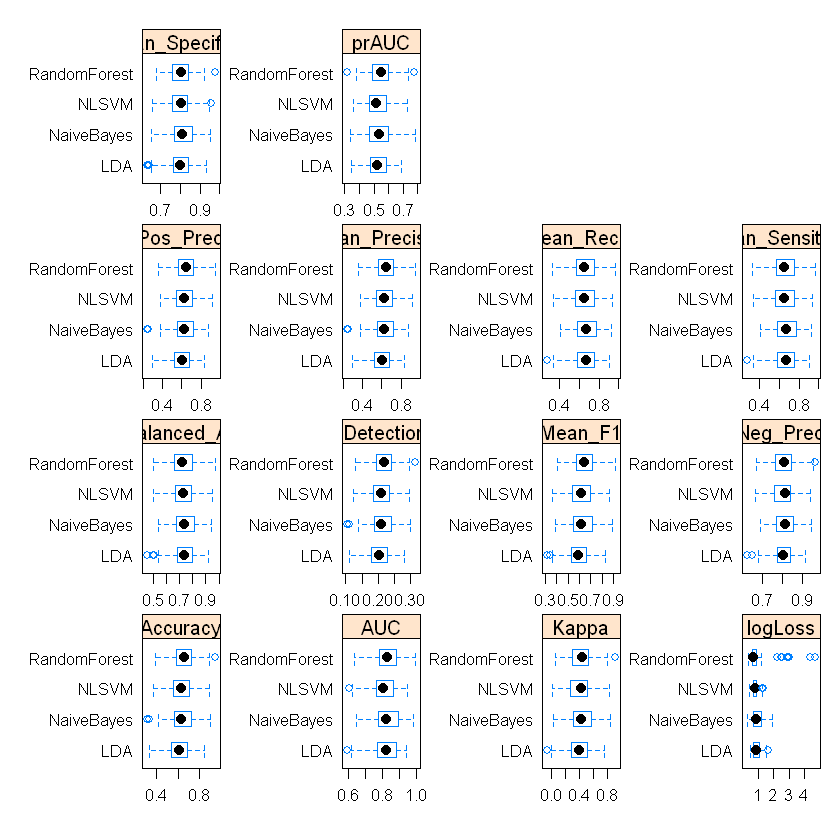

In [9]:
#Boxplots
lattice::bwplot(comp, scales = list(x = list(relation = "free"), y = list(relation = "free")))

In [10]:
#Correlations between models
round(caret::modelCor(comp),2)

,NaiveBayes,LDA,RandomForest,NLSVM
NaiveBayes,1.00,-0.15,-0.21,-0.01
LDA,-0.15,1.00,0.12,-0.06
RandomForest,-0.21,0.12,1.00,-0.17
NLSVM,-0.01,-0.06,-0.17,1.00


## 3. Pre-processing test data
Steps for test (same steps as formerly done for train, except for deleting multivariate outliers through Mahalanobis' distance):
1. Separate data into target and predictors
2. One-Hot-Encoding for categorical predictors (not necessary here)
3. Robust winsorizing of predictors (with robust z-values + MAD parameters from train) to adjust extreme univariate values (threshold alpha = .01)
4. Re-integrate pre-processed predictors with target variable
5. Use preProcess (parameters of train)

In [11]:
#Save target separately
target_test <- test_raw$performance
test <- test_raw[, -1]

In [12]:
#Process one-hot-encoding for categorical variables
test <- as.data.frame(predict(dmy, test))

summary(test)

    quality      service_orientation   innovation     organisation  
 Min.   :2.000   Min.   :2.000       Min.   :2.000   Min.   :2.000  
 1st Qu.:3.000   1st Qu.:3.000       1st Qu.:3.000   1st Qu.:3.000  
 Median :4.000   Median :4.000       Median :3.000   Median :3.000  
 Mean   :3.558   Mean   :3.884       Mean   :3.326   Mean   :3.116  
 3rd Qu.:4.000   3rd Qu.:4.000       3rd Qu.:4.000   3rd Qu.:4.000  
 Max.   :5.000   Max.   :5.000       Max.   :5.000   Max.   :5.000  
 problem_solving   curiosity     determination       analysis     
 Min.   :2.000   Min.   :0.500   Min.   :0.6800   Min.   :0.2700  
 1st Qu.:3.000   1st Qu.:0.770   1st Qu.:0.7900   1st Qu.:0.5750  
 Median :3.000   Median :0.870   Median :0.9000   Median :0.6700  
 Mean   :3.535   Mean   :0.846   Mean   :0.8851   Mean   :0.7172  
 3rd Qu.:4.000   3rd Qu.:0.935   3rd Qu.:1.0000   3rd Qu.:0.9250  
 Max.   :5.000   Max.   :1.000   Max.   :1.0000   Max.   :1.0000  
  empowerment    
 Min.   :0.4800  
 1st Qu.:0.8

In [13]:
#Winsorizing (robust method with same median and mad parameters of train)
test <- wins_rob(test, centers = centers_train, scales = scales_train)

summary(test)

    quality      service_orientation   innovation     organisation  
 Min.   :2.000   Min.   :3.743       Min.   :2.743   Min.   :2.000  
 1st Qu.:3.000   1st Qu.:3.743       1st Qu.:3.000   1st Qu.:3.000  
 Median :4.000   Median :4.000       Median :3.000   Median :3.000  
 Mean   :3.558   Mean   :3.976       Mean   :3.072   Mean   :3.116  
 3rd Qu.:4.000   3rd Qu.:4.000       3rd Qu.:3.257   3rd Qu.:4.000  
 Max.   :5.000   Max.   :4.257       Max.   :3.257   Max.   :5.000  
 problem_solving   curiosity     determination       analysis     
 Min.   :2.000   Min.   :0.500   Min.   :0.7114   Min.   :0.2700  
 1st Qu.:3.000   1st Qu.:0.770   1st Qu.:0.7900   1st Qu.:0.5750  
 Median :3.000   Median :0.870   Median :0.9000   Median :0.6700  
 Mean   :3.535   Mean   :0.846   Mean   :0.8859   Mean   :0.7172  
 3rd Qu.:4.000   3rd Qu.:0.935   3rd Qu.:1.0000   3rd Qu.:0.9250  
 Max.   :5.000   Max.   :1.000   Max.   :1.0000   Max.   :1.0000  
  empowerment    
 Min.   :0.7595  
 1st Qu.:0.8

In [14]:
#Re-integrate data with target
test <- data.frame(performance = target_test, test)

In [15]:
#Pre-process test (with the same parameters as train)
test <- as.data.frame(predict(prep, test))

In [16]:
summary(test)

 performance    quality         service_orientation   innovation      
 C:15        Min.   :-2.11777   Min.   :-1.1626     Min.   :-1.86932  
 B:23        1st Qu.:-0.69550   1st Qu.:-1.1626     1st Qu.:-0.34369  
 A: 5        Median : 0.72676   Median : 0.3819     Median :-0.34369  
             Mean   : 0.09832   Mean   : 0.2382     Mean   : 0.08207  
             3rd Qu.: 0.72676   3rd Qu.: 0.3819     3rd Qu.: 1.18195  
             Max.   : 2.14903   Max.   : 1.9264     Max.   : 1.18195  
  organisation     problem_solving       curiosity        determination     
 Min.   :-1.6582   Min.   :-2.251706   Min.   :-2.48897   Min.   :-1.85485  
 1st Qu.:-0.2880   1st Qu.:-0.779107   1st Qu.:-0.53267   1st Qu.:-1.08620  
 Median :-0.2880   Median :-0.779107   Median : 0.19189   Median :-0.01071  
 Mean   :-0.1287   Mean   : 0.008562   Mean   : 0.01833   Mean   :-0.14878  
 3rd Qu.: 1.0821   3rd Qu.: 0.693491   3rd Qu.: 0.66285   3rd Qu.: 0.96701  
 Max.   : 2.4522   Max.   : 2.166090   Ma

In [17]:
anyNA(test)

[1] FALSE

# 4. Model evaluation

## 4.1 Naive Bayes

### 4.1.1 Out of sample prediction (with test)

In [18]:
#Predict test targets
pred_nb <- as.ordered(caret::predict.train(ml_nb, newdata = test))

In [19]:
#ROC curve
(roc_nb <- pROC::multiclass.roc(test$performance, pred_nb))

Setting direction: controls < cases
Setting direction: controls < cases
Setting direction: controls < cases



Call:
multiclass.roc.default(response = test$performance, predictor = pred_nb)

Data: pred_nb with 3 levels of test$performance: C, B, A.
Multi-class area under the curve: 0.9034

In [32]:
#Confusion Matrix
cm_nb <- caret::confusionMatrix(reference = test$performance,
                                data = pred_nb, 
                                mode = "everything", positive = "A")

cm_nb

Confusion Matrix and Statistics

          Reference
Prediction  C  B  A
         C  8  1  0
         B  7 19  0
         A  0  3  5

Overall Statistics
                                          
               Accuracy : 0.7442          
                 95% CI : (0.5883, 0.8648)
    No Information Rate : 0.5349          
    P-Value [Acc > NIR] : 0.003994        
                                          
                  Kappa : 0.5604          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: C Class: B Class: A
Sensitivity            0.5333   0.8261   1.0000
Specificity            0.9643   0.6500   0.9211
Pos Pred Value         0.8889   0.7308   0.6250
Neg Pred Value         0.7941   0.7647   1.0000
Precision              0.8889   0.7308   0.6250
Recall                 0.5333   0.8261   1.0000
F1                     0.6667   0.7755   0.7692
Prevalence             0.3488   0.5349   0.1163
Detec

### 4.1.2 Analyse false predictions

In [21]:
test %>% 
  dplyr::mutate(performance = as.character(performance),
         performance_pred_nb = as.character(pred_nb),
         correct = case_when(
           performance_pred_nb == performance ~ TRUE,
           TRUE ~ FALSE)) %>% 
  dplyr::filter(correct == FALSE) %>% 
  dplyr::select(performance_pred_nb, performance, all_of(ml_nb$finalModel$varnames))

performance_pred_nb,performance,problem_solving,organisation,service_orientation,quality,innovation
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
B,C,-0.7791074,-0.288038,0.3818871,0.7267628,-0.3436871
B,C,0.6934912,-1.658165,0.3818871,-0.6955041,-0.3436871
A,B,0.6934912,1.082089,0.3818871,0.7267628,-0.3436871
B,C,-0.7791074,-0.288038,0.3818871,-0.6955041,-0.3436871
B,C,-0.7791074,-0.288038,0.3818871,0.7267628,-0.3436871
B,C,0.6934912,-0.288038,1.9264083,-0.6955041,-0.3436871
B,C,-2.2517061,-0.288038,0.3818871,0.7267628,-0.3436871
A,B,0.6934912,1.082089,0.3818871,0.7267628,-0.3436871
A,B,0.6934912,1.082089,-1.1626341,2.1490296,1.1819482


## 4.2 Linear Discriminant Analysis

### 4.2.1 Out of sample validity (for test)

In [44]:
#Predict values of test
pred_lda <- as.ordered(caret::predict.train(ml_lda, newdata = test))

In [23]:
#ROC Curve
(roc_lda <- pROC::multiclass.roc(test$performance, pred_lda))

Setting direction: controls < cases
Setting direction: controls < cases
Setting direction: controls < cases



Call:
multiclass.roc.default(response = test$performance, predictor = pred_lda)

Data: pred_lda with 3 levels of test$performance: C, B, A.
Multi-class area under the curve: 0.9217

In [33]:
#Confusion Matrix
cm_lda <- caret::confusionMatrix(reference = test$performance,
                                 data = pred_lda, 
                                 mode = "everything", positive = "A")

cm_lda

Confusion Matrix and Statistics

          Reference
Prediction  C  B  A
         C 11  1  0
         B  4 17  0
         A  0  5  5

Overall Statistics
                                          
               Accuracy : 0.7674          
                 95% CI : (0.6137, 0.8824)
    No Information Rate : 0.5349          
    P-Value [Acc > NIR] : 0.00144         
                                          
                  Kappa : 0.6215          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: C Class: B Class: A
Sensitivity            0.7333   0.7391   1.0000
Specificity            0.9643   0.8000   0.8684
Pos Pred Value         0.9167   0.8095   0.5000
Neg Pred Value         0.8710   0.7273   1.0000
Precision              0.9167   0.8095   0.5000
Recall                 0.7333   0.7391   1.0000
F1                     0.8148   0.7727   0.6667
Prevalence             0.3488   0.5349   0.1163
Detec

## 4.3 Random Forest

### 4.3.1 Out of Sample validation

In [45]:
#Predict values of test
pred_forest <- as.ordered(caret::predict.train(ml_forest, newdata = test))

In [26]:
#ROC Curve
(roc_forest <- pROC::multiclass.roc(test$performance, pred_forest))

Setting direction: controls < cases
Setting direction: controls < cases
Setting direction: controls < cases



Call:
multiclass.roc.default(response = test$performance, predictor = pred_forest)

Data: pred_forest with 3 levels of test$performance: C, B, A.
Multi-class area under the curve: 0.8691

In [34]:
#Confusion Matrix
cm_forest <- caret::confusionMatrix(reference = test$performance,
                                    data = pred_forest, 
                                    mode = "everything", positive = "A")

cm_forest

Confusion Matrix and Statistics

          Reference
Prediction  C  B  A
         C 10  5  0
         B  4 14  0
         A  1  4  5

Overall Statistics
                                          
               Accuracy : 0.6744          
                 95% CI : (0.5146, 0.8092)
    No Information Rate : 0.5349          
    P-Value [Acc > NIR] : 0.04509         
                                          
                  Kappa : 0.481           
                                          
 Mcnemar's Test P-Value : 0.16384         

Statistics by Class:

                     Class: C Class: B Class: A
Sensitivity            0.6667   0.6087   1.0000
Specificity            0.8214   0.8000   0.8684
Pos Pred Value         0.6667   0.7778   0.5000
Neg Pred Value         0.8214   0.6400   1.0000
Precision              0.6667   0.7778   0.5000
Recall                 0.6667   0.6087   1.0000
F1                     0.6667   0.6829   0.6667
Prevalence             0.3488   0.5349   0.1163
Detec

## 4.4 Non-Linear Support Vector Machines

### 4.4.1 Out of Sample validation

In [46]:
#Predict values of test
pred_svmnl <- as.ordered(caret::predict.train(ml_svmnl, newdata = test))

In [29]:
#ROC Curve
(roc_svmnl <- pROC::multiclass.roc(test$performance, pred_svmnl))

Setting direction: controls < cases
Setting direction: controls < cases
Setting direction: controls < cases



Call:
multiclass.roc.default(response = test$performance, predictor = pred_svmnl)

Data: pred_svmnl with 3 levels of test$performance: C, B, A.
Multi-class area under the curve: 0.8937

In [35]:
#Confusion Matrix
cm_svmnl <- caret::confusionMatrix(reference = test$performance,
                                   data = pred_svmnl, 
                                   mode = "everything", positive = "A")

cm_svmnl

Confusion Matrix and Statistics

          Reference
Prediction  C  B  A
         C 10  5  0
         B  5 15  0
         A  0  3  5

Overall Statistics
                                          
               Accuracy : 0.6977          
                 95% CI : (0.5387, 0.8282)
    No Information Rate : 0.5349          
    P-Value [Acc > NIR] : 0.0222          
                                          
                  Kappa : 0.5027          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: C Class: B Class: A
Sensitivity            0.6667   0.6522   1.0000
Specificity            0.8214   0.7500   0.9211
Pos Pred Value         0.6667   0.7500   0.6250
Neg Pred Value         0.8214   0.6522   1.0000
Precision              0.6667   0.7500   0.6250
Recall                 0.6667   0.6522   1.0000
F1                     0.6667   0.6977   0.7692
Prevalence             0.3488   0.5349   0.1163
Detec

## 4.5 Comparative Analysis of Out-Of-Sample Validity

In this last step, I will sum up the most important statistics referring to the compared models' out-of-sample validity metrics. First, I will take all models' Kappas into account. Kappa forms a good starting point for model comparison as it gives us an understanding of how well each model does in comparison to just guessing the classes (any value greater than 0 means it does better than the guessing base line model). Afterwards, I will take a look at some Class A performance metrics. **Class A refers to the best performance class - and, in recruitment, we are usually most interested in identifying our top future talents**. Precisely, I will consider:

- **Class A F1**: The F1 metric is more appropriate for imbalanced data sets than accuracy alone. Precisely, the F1 score combines the precision and recall metrics for each class into a single score.
- **Class A specificity**: Additionally, I will look at the specificty of Class A. This performance marker is paramount for our project context as it reflects what percentage of actual Class B or C candidates have been correctly classified as "non Class A performers" (as opposed to having been falsely classified as Class A performers). Therefore, for any recruiter, a model that only classifies actual top performers as such is most helpful.

### 4.5.1 Overview of Out-of-Sample Validity

In [40]:
comp_oos <- data.frame(Model = c("NB", "LDA", "RF", "NL_SVM"),
                       Kappa = c(cm_nb$overall["Kappa"],
                                 cm_lda$overall["Kappa"],
                                 cm_forest$overall["Kappa"],
                                 cm_svmnl$overall["Kappa"]),
                       Class_a_f1 = c(cm_nb$byClass[3,7],
                                      cm_lda$byClass[3,7],
                                      cm_forest$byClass[3,7],
                                      cm_svmnl$byClass[3,7]),
                       Class_a_specifity = c(cm_nb$byClass[3,2],
                                             cm_lda$byClass[3,2],
                                             cm_forest$byClass[3,2],
                                             cm_svmnl$byClass[3,2]))

comp_oos <- mutate_if(comp_oos, is.numeric, ~round(., 2))

comp_oos

Model,Kappa,Class_a_f1,Class_a_specifity
<fct>,<dbl>,<dbl>,<dbl>
NB,0.56,0.77,0.92
LDA,0.62,0.67,0.87
RF,0.48,0.67,0.87
NL_SVM,0.50,0.77,0.92


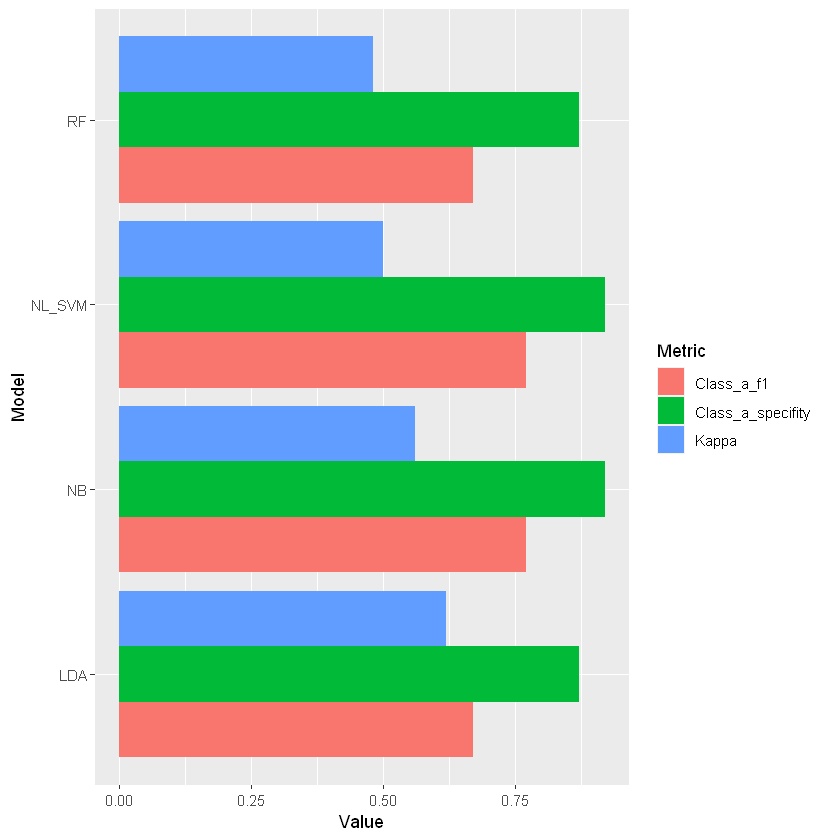

In [42]:
comp_oos2 <- tidyr::pivot_longer(comp_oos, cols=names(comp_oos[2:4]), names_to = "Metric", 
values_to = "Value")


ggplot(comp_oos2, aes(x = Model, y = Value, fill = Metric)) +
    geom_bar(stat='identity', position='dodge') + coord_flip()

### 4.5.2 Conclusion

After plotting our three chosen metrics for each of the four models, we can observe that in terms of Kappa, LDA has reached the highest value (~ .62). However, taking into account the Class A metrics, Non-Linear Support Vector Machines and Naive Bayes made for the better candidates.

As mentioned, in our project context we want to focus on a good performance especially for Class A predictions. Also - as parsimony of predictors is paramount to this project - comparing NLSVM and NB, the latter model needed far fewer predictor variables (just 5, as opposed to all possible 11 predictors in NLSVM) to reach a comparable performance outcome.

To conclude, in this case I would go ahead with **Naive Bayes as it shows decent model performance after selecting just a small number of all predictors**. Choosing this model will serve our two main project objectives:

1. Select the most meaningful predictors amongst a predictor pool (which, in the real project, would be much more extended than depicted here) to streamline the recruitment process.
2. Make class predictions for a big number of job candidates based on previous benchmark modelling, and focusing mainly on the goodness of prediction model for the predicted Class A performers (as these candidates are the most likely to be selected into the company).

# 5. Save workspace
To use the workspace in a different notebook, I will save it as an R object to be able to import it into other notebooks.

In [31]:
save.image(file = "03_Objects/model_evaluation.RData")